In [1]:
import tensorflow as tf
import numpy as np
import sys
sys.path.append('../')
import utils.preprocess as preprocess

In [2]:
pre = preprocess.preprocess("D:/DataSet/CICIDS2017/CSV/Wednesday-workingHours.pcap_ISCX.csv", labelColumnName='Label')
X_train, X_test, y_train, y_test = pre.preprocessing()

In [3]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [4]:
import utils.network.network6 as model
from utils.metrics import metric

In [5]:
net = model.MyLstmModel()

In [6]:
algorithm = tf.keras.optimizers.RMSprop(learning_rate=0.01, rho=0.9, momentum=0.89, epsilon=1e-07, centered=False, name='RMSprop')
net.compile(optimizer=algorithm, loss='categorical_crossentropy', metrics=metric())

In [7]:
from tensorflow.keras import callbacks
import datetime
dir_name = datetime.datetime.now().strftime("%Y%m%d-%H%M%S-network6-RMSprop")
logdir = os.path.join("../tensorboard", dir_name)
tensorboard_callback = callbacks.TensorBoard(logdir, histogram_freq=1)
# lrate = callbacks.LearningRateScheduler(opt_.exp_decay)

In [8]:
import numpy as np
model_ = net.fit(X_train, y_train, epochs=60, batch_size=512, validation_split=0.3, callbacks=[tensorboard_callback], verbose=1) # lrate

.0000 - val_fp: 4206.0000 - val_tn: 286186.0000 - val_fn: 3106.0000 - val_categorical_accuracy: 0.9729 - val_categorical_crossentropy: 0.0659 - val_precision: 0.9713 - val_recall: 0.9786 - val_auc: 0.9938
Epoch 5/40
662/662 [==============================] - 55s 83ms/step - loss: 0.0925 - acc: 0.0000e+00 - tp: 330877.0000 - fp: 17254.0000 - tn: 660322.0000 - fn: 7911.0000 - categorical_accuracy: 0.9663 - categorical_crossentropy: 0.0870 - precision: 0.9504 - recall: 0.9766 - auc: 0.9939 - val_loss: 0.0743 - val_acc: 0.0000e+00 - val_tp: 141371.0000 - val_fp: 3997.0000 - val_tn: 286395.0000 - val_fn: 3825.0000 - val_categorical_accuracy: 0.9729 - val_categorical_crossentropy: 0.0691 - val_precision: 0.9725 - val_recall: 0.9737 - val_auc: 0.9940
Epoch 6/40
662/662 [==============================] - 55s 83ms/step - loss: 0.0888 - acc: 0.0000e+00 - tp: 331091.0000 - fp: 16198.0000 - tn: 661378.0000 - fn: 7697.0000 - categorical_accuracy: 0.9676 - categorical_crossentropy: 0.0833 - precisio

In [9]:
from utils.evl_metrics import confusion_matrix, eva_metric
y_pred = net.predict(X_test)
y_class = np.argmax(y_pred, axis=1)
y_label = np.argmax(y_test, axis=1)
confusion_matrix(y_label, y_class)
eva_metric(y_label, y_class)


TrueNegatives result:  128001.0
TruePositives result:  73529.0
FalseNegatives result:  2047.0
FalsePositives result:  3845.0
Recall result:  0.9729147
Precision result:  0.9503063


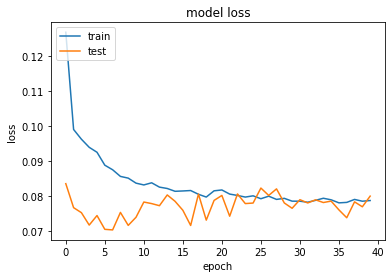

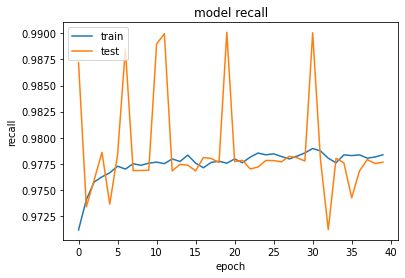

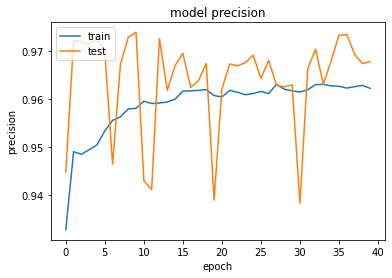

In [10]:
import utils.graph as fig
fig.add_dir(dir_name)
fig.loss_graph(model_,dir_name)
fig.recall_graph(model_,dir_name)
fig.precision_graph(model_,dir_name)